# Final Project Report

* Class: DS 5100
* Student Name: Trenton Ribbens
* This URL: https://github.com/tribbens/kvu2et_ds5100_montecarlo/blob/main/montecarlo_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/tribbens/kvu2et_ds5100_montecarlo

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import pandas as pd
import numpy as np
import random
from itertools import product
from itertools import combinations_with_replacement

class Die():
    '''
    PURPOSE:  To allow the user to create a Die object with N sides or faces and W weights.
    The weights default to 1.0 and can be customized to fit the user's needs.
    The only behavior is for it to be rolled one or more times.
    '''
    
    def __init__(self, faces):
        '''
        PURPOSE:  Create the initial die using the faces passed to the function and set all weights equal to 1.
        
        INPUTS:
        faces  numpy array (of strings or integers)
        
        OUTPUTS:
        None  internally saves die with faces and weights in private dataframe
        '''
        
        #raise TypeError of faces argument is not a NumPy array
        if type(faces) != np.ndarray:
            raise TypeError("faces argument must be a NumPy array")
        
        #confirm array values are distinct
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Face values must be distinct!")
        
        faces = pd.Series(faces)
        self.faces = list(faces)
        W = []
        for i in range(len(faces)):
            W.append(1.0)
        die_priv_df = pd.DataFrame(W)
        die_priv_df = die_priv_df.set_index(faces)
        #save current die faces and weights as private data frame
        self._die_status = die_priv_df
        
    def weight_change(self, face_value, new_weight):
        '''
        PURPOSE:  Change the weight of one side of the die to the value passed to the function.
        
        INPUTS:  
        face_value  str or int (depending on how the initial die was setup)
        new_weight  int or float
        
        OUTPUTS:
        None  Internally revises the weight of one face in the private dataframe.
        '''
        
        #confirm face value is one of the faces and raise IndexError if not
        if face_value not in self.faces:
            raise IndexError("Not a valid face value")
            
        #raise TypeError for invalid weight
        if (type(new_weight) != float) and (type(new_weight) != int):
            try:
                float(new_weight)
            except:
                raise TypeError("The new weight must be a numeric value")
        
        #change weight of indicated face value
        self._die_status[0][face_value] = new_weight
        
    def roll_die(self, num_rolls=1):
        '''
        PURPOSE:  Roll the die the specified number of times and return the outcomes as a list.
        
        INPUTS:
        num_rolls  int, default=1
        
        OUTPUTS:
        roll_outcomes  list (of face values as int or str)
        '''
        #initiate blank list for outcome
        roll_outcomes = []
        #convert current weights to a list
        weights_list = self._die_status[0].tolist()
        #run selection desired number of times
        for i in range(num_rolls):
            roll_outcomes.append(random.choices(self.faces, weights_list)[0])
        
        return roll_outcomes
    
    def view_die(self):
        '''
        PURPOSE:  The view the current faces and weights of the die as a dataframe.
        
        INPUTS:
        None
        
        OUTPUTS:
        _die_status  pandas data frame
        '''
                
        return self._die_status

#-----------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------

class Game():
    '''
    PURPOSE:  To allow the user to create a game which consists of rolling one or more
    similar dice (Die objects) one or more times. Similar dice means that each die
    has the same number of sides and associated faces, but my have thier own weights.
    Game objects have a behavior to play a game, which consists of rolling all dice a given
    number of times. Game objects only keep the results of the most recent play.
    '''
    
    def __init__(self, current_die):
        '''
        PURPOSE:  Create a game object based on a list of Die objects being used.
        
        INPUTS:
        current_die  list (of Die objects)
        
        OUTPUTS:
        None  Saves the list of current die as an attribute.
        '''
        
        self.current_die = current_die
        
    def play_game(self, num_times):
        '''
        PURPOSE:  Play a game which involves rolling all die the specified number of times and internally recording the results.
        
        INPUTS:
        num_times  int
        
        OUTPUTS:
        None  Internally saves the results of all rolls for all die in a private data frame.
        '''
        
        #initiate blank dataframe
        game_results = pd.DataFrame()
        
        #set column index count to zero
        i = 0
        
        for dice in self.current_die:
            #run roll_die method
            roll_results = dice.roll_die(num_rolls=num_times)
            #save results to dictionary with list index as key
            new_result = {i: roll_results}
            #convert to a dataframe
            new_result_df = pd.DataFrame(new_result)
            #add the new column to the data frame
            game_results = pd.concat([game_results, new_result_df], axis=1)
            #add 1 to list index
            i += 1
                
        #create list of rolls
        rolls = []
        for i in range(1, num_times+1):
            rolls.append(i)
        rolls = pd.Series(rolls)
        #rename index and set values to roll number
        game_results = game_results.set_index(rolls)
        game_results.index.name = "Roll Number"

        #most recent results saved as a private data frame
        self._game_results = game_results
        
        
    def recent_results(self, wide=True):
        '''
        PURPOSE:  Obtain the results of the most recent game played from play_game method.
        The results can be in a wide data frame or narrow data frame based on value passed to variable "wide".
        
        INPUTS:
        wide  bool, default=True
        
        OUTPUTS:
        _game_results  pandas data frame
        '''
        
        #Raise ValueError if bool isn't passed as value for wide
        if type(wide) != bool:
            raise ValueError("Value for wide must be True or False")
            
        elif wide:
            return self._game_results
        
        else:          
            return self._game_results.unstack().to_frame().swaplevel()
    
    def get_faces(self):
        '''
        PURPOSE:  Obtain the list of face options for the die currently being used in the game.
        This method assumes that all die have the same face options. It will be used in the Analyzer class.
        
        INPUTS:
        None
        
        OUTPUTS:
        face_options  list (of strings or integers)
        '''
        
        #this will be used in Analyzer class so I know the face options
        face_options = self.current_die[0].view_die().index.to_list()
        return face_options
    
    def get_dice_count(self):
        '''
        PURPOSE:  Obtain the number of die currently being used in the game.
        It will be used in the Analyzer class.
        
        INPUTS:
        None
        
        OUTPUTS:
        num_die_in_play  int
        '''
        
        #this will be used in the Analyzer class so I know the number of dice in play
        num_die_in_play = len(self.current_die)
        return num_die_in_play


#-------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------


class Analyzer():
    '''
    PURPOSE:  An Analyzer object takes the results of a single game (Game object)
    and computes various descriptive statistical properties about it.
    '''
        
    def __init__(self, input_game):
        '''
        PURPOSE:  To create an Analyzer object using an input of a Game object.
        Assigns game input to attribute "game".
        
        INPUTS:
        input_game  Game object
        
        OUTPUT:
        None  assigns variable input_game to game attribute
        '''
        
        if type(input_game) != Game:
            raise ValueError("Input must be a Game object")
        
        self.game = input_game
        
    
    def jackpot(self):
        '''
        PURPOSE:  To compute the number of times the game resulted in a jackpot.
        
        INPUTS:
        None
        
        OUTPUTS:
        num_jackpots  int
        '''
        
        #save recent game results as variable
        game_results = self.game.recent_results()
        
        #set jackpot count to 0
        num_jackpots = 0
        
        #iterate through the rows
        for i in range(1, len(self.game.recent_results())+1):
            if len(game_results.loc[i].unique()) == 1:
                num_jackpots += 1
            else:
                pass
        
        return num_jackpots
    
    def face_counts_per_roll(self):
        '''
        PURPOSE:  Computes the number of times a given face is rolled in each event and
        returns a data frame of the results.
        
        INPUTS:
        None
        
        OUTPUTS:
        count_df  pandas data frame
        '''
        
        game_results = self.game.recent_results()
        
        #create blank dictionary
        count_dict = {i: [] for i in self.game.get_faces()}
        
        # iterate through the rows and append the count of each face
        for i in range(1, len(self.game.recent_results())+1):
            row = list(game_results.loc[i])
            for x in self.game.get_faces():
                count_dict[x].append(row.count(x))
        
        #turn the dictionary of counts into a data frame
        count_df = pd.DataFrame(count_dict)
                                     
        return count_df
                                     
    
    def combo_count(self):
        '''
        PURPOSE:  Computes the distinct combinations of faces rolled and their counts.
        It returns the results as a data frame.
        
        INPUTS:
        None
        
        OUTPUTS:
        combo_df  pandas data frame
        '''
        
        #save recent game results as variable
        game_results = self.game.recent_results()
        
        #generate all combinations based on faces and number of die
        combs = combinations_with_replacement(self.game.get_faces(), self.game.get_dice_count())
        
        #create blank dataframe using the combinations as the index (as a string)
        data = {'Combination': [str(list(i)) for i in list(combs)]}
        combo_df = pd.DataFrame(data)
        combo_df.index = combo_df['Combination']
        combo_df['Count'] = 0
        combo_df = combo_df['Count'].to_frame()
        
        # iterate through the rows and increase the count for each combination rolled
        for i in range(1, len(self.game.recent_results())+1):
            row = str(sorted(list(game_results.loc[i])))
            combo_df.loc[row][0] = combo_df.loc[row][0] + 1
        
        #remove rows with a count of 0
        combo_df = combo_df[combo_df['Count'] > 0]
        
        return combo_df
            
    def permutation_count(self):
        '''
        PURPOSE:  Computes the distinct permutations of faces rolled and their counts.
        It returns a data frame of the results.
        
        INPUTS:
        None
        
        OUTPUTS:
        perm_df  pandas data frame
        '''
        
        #save recent game results as variable
        game_results = self.game.recent_results()
        
        #generate all permutations based on faces and number of die
        perms = product(self.game.get_faces(), repeat=self.game.get_dice_count())
        
        #create blank dataframe using the combinations as the index (as a string)
        data = {'Permutation': [str(list(i)) for i in list(perms)]}
        perm_df = pd.DataFrame(data)
        perm_df.index = perm_df['Permutation']
        perm_df['Count'] = 0
        perm_df = perm_df['Count'].to_frame()
        
        # iterate through the rows and increase the count for each permutation rolled
        for i in range(1, len(self.game.recent_results())+1):
            row = str(sorted(list(game_results.loc[i])))
            perm_df.loc[row][0] = perm_df.loc[row][0] + 1
            
        #remove rows with a count of 0
        perm_df = perm_df[perm_df['Count'] > 0]
        
        return perm_df
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
from montecarlo.montecarlo import Die
from montecarlo.montecarlo import Game
from montecarlo.montecarlo import Analyzer
import pandas as pd
import numpy as np

class MonteCarloTestSuite(unittest.TestCase):
    
    def test_1_init(self):
        die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        testing = type(die2) == Die
        message = "Dice setup not working correctly"
        
        self.assertTrue(testing, message)
        
    def test_2_weight_change(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        state1 = sum(die1.view_die()[0])
        die1.weight_change(1, 5)
        state2 = sum(die1.view_die()[0])

        status = state1 == state2
        message = "Changing weight not working correctly"
        
        self.assertFalse(status, message)
        
    def test_3_roll_die(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        status = type(die1.roll_die(10))
        type1 = list
        message = "roll_die method not working correctly"
        
        self.assertEqual(status, type1, message)
        
    def test_4_view_die(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        status = type(die1.view_die())
        type1 = pd.DataFrame
        message = "view_die not returning a pandas data frame"
        
        self.assertEqual(status, type1, message)
        
    def test_5_init(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game2 = Game([die1, die1, die1])
        
        testing = type(game2) == Game
        message = "Game setup not working correctly"
        
        self.assertTrue(testing, message)
        
    def test_6_play_game(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game1 = Game([die1, die1, die1])
        game1.play_game(100)
        
        testing = len(game1.recent_results()) == 100
        message = "play_game not working correctly"
        
        self.assertTrue(testing, message)
    
    def test_7_recent_results(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game1 = Game([die1, die1, die1])
        game1.play_game(100)
        
        testing = type(game1.recent_results()) == pd.DataFrame
        message = "recent_results not working correctly"
        
        self.assertTrue(testing, message)
        
    def test_8_init(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game1 = Game([die1, die1, die1])
        game1.play_game(100)
        analyzer2 = Analyzer(game1)
        
        testing = type(analyzer2) == Analyzer
        message = "Analyzer setup not working correctly"
        
        self.assertTrue(testing, message)
        
    def test_9_jackpot(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game1 = Game([die1, die1, die1])
        game1.play_game(100)
        analyzer1 = Analyzer(game1)
        
        testing = type(analyzer1.jackpot()) == int
        message = "jackpot method not working correctly"
        
        self.assertTrue(testing, message)
        
    def test_10_face_counts_per_roll(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game1 = Game([die1, die1, die1])
        game1.play_game(100)
        analyzer1 = Analyzer(game1)
        
        testing = type(analyzer1.face_counts_per_roll()) == pd.DataFrame
        message = "face_counts_per_roll not working correctly"
        
        self.assertTrue(testing, message)
        
    def test_11_combo_count(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game1 = Game([die1, die1, die1])
        game1.play_game(100)
        analyzer1 = Analyzer(game1)
        
        testing = type(analyzer1.combo_count()) == pd.DataFrame
        message = "combo_count not working correctly"
        
        self.assertTrue(testing, message)
        
    def test_12_permutation_count(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game1 = Game([die1, die1, die1])
        game1.play_game(100)
        analyzer1 = Analyzer(game1)
        
        testing = type(analyzer1.permutation_count()) == pd.DataFrame
        message = "permutation_count not working correctly"
        
        self.assertTrue(testing, message)
        
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```bash
bash-4.4$python montecarlo_test.py
test_10_face_counts_per_roll (__main__.MonteCarloTestSuite.test_10_face_counts_per_roll) ... ok
test_11_combo_count (__main__.MonteCarloTestSuite.test_11_combo_count) ... ok
test_12_permutation_count (__main__.MonteCarloTestSuite.test_12_permutation_count) ... ok
test_1_init (__main__.MonteCarloTestSuite.test_1_init) ... ok
test_2_weight_change (__main__.MonteCarloTestSuite.test_2_weight_change) ... ok
test_3_roll_die (__main__.MonteCarloTestSuite.test_3_roll_die) ... ok
test_4_view_die (__main__.MonteCarloTestSuite.test_4_view_die) ... ok
test_5_init (__main__.MonteCarloTestSuite.test_5_init) ... ok
test_6_play_game (__main__.MonteCarloTestSuite.test_6_play_game) ... ok
test_7_recent_results (__main__.MonteCarloTestSuite.test_7_recent_results) ... ok
test_8_init (__main__.MonteCarloTestSuite.test_8_init) ... ok
test_9_jackpot (__main__.MonteCarloTestSuite.test_9_jackpot) ... ok
----------------------------------------------------------------------
Ran 12 tests in 0.064s
OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo.montecarlo as montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(input_game)
     |  
     |  PURPOSE:  An Analyzer object takes the results of a single game (Game object)
     |  and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_game)
     |      PURPOSE:  To create an Analyzer object using an input of a Game object.
     |      Assigns game input to attribute "game".
     |      
     |      INPUTS:
     |      input_game  Game object
     |      
     |      OUTPUT:
     |      None  assigns variable input_game to game attribute
     |  
     |  combo_count(self)
     |      PURPOSE:  Computes the distinct combinations of faces rolled and their counts.
     |      It returns the results as a data frame.
     |      
     |      INPUTS:
     |    

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/tribbens/kvu2et_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```bash
bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/qumulo/qhome/kvu2et/Documents/MSDS/DS5100/kvu2et_ds5100_montecarlo
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: montecarlo
  Building wheel for montecarlo (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-0.1-py3-none-any.whl size=4738 sha256=8bb4276f7da3e3c6c14b5ea983ba7d33463f4fe7908c65f38738275f4747c903
  Stored in directory: /tmp/pip-ephem-wheel-cache-sdm6srji/wheels/33/73/e1/22d8fcff0b9a94980abf64371d6ce86dc25e581cf18410a5f0
Successfully built montecarlo
Installing collected packages: montecarlo
Successfully installed montecarlo-0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
#import classes individually to make things easier
from montecarlo.montecarlo import Die
from montecarlo.montecarlo import Game
from montecarlo.montecarlo import Analyzer
#import pandas and numpy
import pandas as pd
import numpy as np

In [4]:
coin1 = Die(np.array(['H', 'T']))
coin2 = Die(np.array(['H', 'T']))
coin2.weight_change('H', 5)

In [5]:
#confirm they are correct
coin1.view_die()

,0
H,1.0
T,1.0


In [6]:
coin2.view_die()

,0
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [7]:
fair_game = Game([coin1, coin1])
fair_game.play_game(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [8]:
unfair_game = Game([coin2, coin1, coin1])
unfair_game.play_game(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [9]:
#fair coins game
fair_analyzer = Analyzer(fair_game)
fair_analyzer.jackpot()

487

In [10]:
#unfair coins game
unfair_analyzer = Analyzer(unfair_game)
unfair_analyzer.jackpot()

244

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [11]:
freq1 = fair_analyzer.jackpot()/1000
print("Fair Game Jackpot Frequency: ", freq1)
freq2 = unfair_analyzer.jackpot()/1000
print("Unfair Game Jackpot Frequency: ", freq2)

Fair Game Jackpot Frequency:  0.487
Unfair Game Jackpot Frequency:  0.244


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

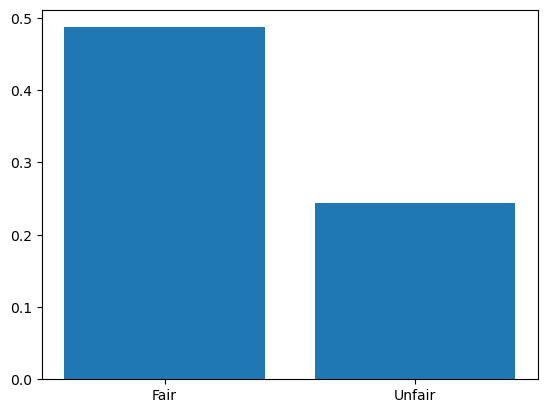

In [12]:
import matplotlib.pyplot as plt

plt.bar([1, 2], [freq1, freq2])
plt.xticks([1, 2], ['Fair', 'Unfair'])
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [13]:
dice1 = Die(np.array([1, 2, 3, 4, 5, 6]))
dice2 = Die(np.array([1, 2, 3, 4, 5, 6]))
dice3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [14]:
dice2.weight_change(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [15]:
dice3.weight_change(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [16]:
dice_game1 = Game([dice1, dice1, dice1, dice1, dice1])
dice_game1.play_game(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [17]:
dice_game2 = Game([dice2, dice3, dice1, dice1, dice1])
dice_game2.play_game(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [18]:
# calculate frequency of jackpots for game 1 and show results
dice_analyzer1 = Analyzer(dice_game1)
rel_freq1 = dice_analyzer1.jackpot()/10000
print("Game 1 Jackpot Frequency: ", rel_freq1)

#calculate frequency of jackpots for game 2 and show results
dice_analyzer2 = Analyzer(dice_game2)
rel_freq2 = dice_analyzer2.jackpot()/10000
print("Game 2 Jackpot Frequency: ", rel_freq2)

Game 1 Jackpot Frequency:  0.0006
Game 2 Jackpot Frequency:  0.0


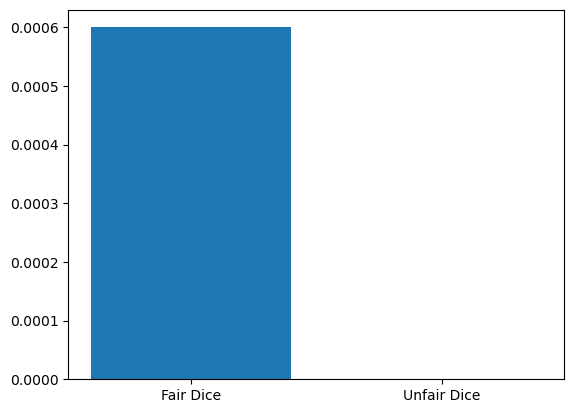

In [19]:
#create bar chart
plt.bar([1, 2], [rel_freq1, rel_freq2])
plt.xticks([1, 2], ['Fair Dice', 'Unfair Dice'])
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [20]:
letters_die = Die(np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
                   'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']))

In [21]:
#read in letter frequency and adjust weights of die
letters_frequency = pd.read_table('english_letters.txt', sep=' ', header=None)
for i in range(26):
    letter = letters_frequency.iloc[i][0]
    weight = letters_frequency.iloc[i][1]
    letters_die.weight_change(letter, weight)

In [22]:
#confirm it worked right
letters_die.view_die()

,0
A,374061888.0
B,70195826.0
C,138416451.0
D,169330528.0
E,529117365.0
F,95422055.0
G,91258980.0
H,216768975.0
I,320410057.0
J,9613410.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [23]:
letters_game = Game([letters_die, letters_die, letters_die, letters_die])
letters_game.play_game(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [31]:
letters_analyzer = Analyzer(letters_game)
perm_df = letters_analyzer.permutation_count()

In [25]:
#bring in scrabble words
scrabble_words = pd.read_table('scrabble_words.txt', header=None)

In [26]:
#turn it into a list for ease of use
words_list = scrabble_words[0].tolist()

In [32]:
#set initial count to zero
real_words = 0

#iterate through the rows and indices but only need indices
for index, row in perm_df.iterrows():
    #remove special character from permutation to turn into a word
    word = index.replace('[', '').replace(']', '').replace(', ', '').replace("'", '')
    #check if word is in scrabble dictionary
    if word in words_list:
        real_words += 1

print("There are " + str(len(perm_df)) + " permutations.")
print("There are " + str(real_words) + " real words.")

There are 860 permutations.
There are 44 real words.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [28]:
#repeat with 5 dice
letters_game2 = Game([letters_die, letters_die, letters_die, letters_die, letters_die])
letters_game2.play_game(1000)

In [33]:
letters_analyzer2 = Analyzer(letters_game2)
perm_df2 = letters_analyzer2.permutation_count()

In [34]:
#set initial count to zero
real_words = 0

#iterate through the rows and indices but only need indices
for index, row in perm_df2.iterrows():
    #remove special character from permutation to turn into a word
    word = index.replace('[', '').replace(']', '').replace(', ', '').replace("'", '')
    #check if word is in scrabble dictionary
    if word in words_list:
        real_words += 1

print("There are " + str(len(perm_df2)) + " permutations.")
print("There are " + str(real_words) + " real words.")

There are 961 permutations.
There are 6 real words.


**Conclusion**: 
Using 4 dice results in more real words.
<br>


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.